## Monte Carlo NVT Simulation

### Funzioni di Autocorrelazione

In [51]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

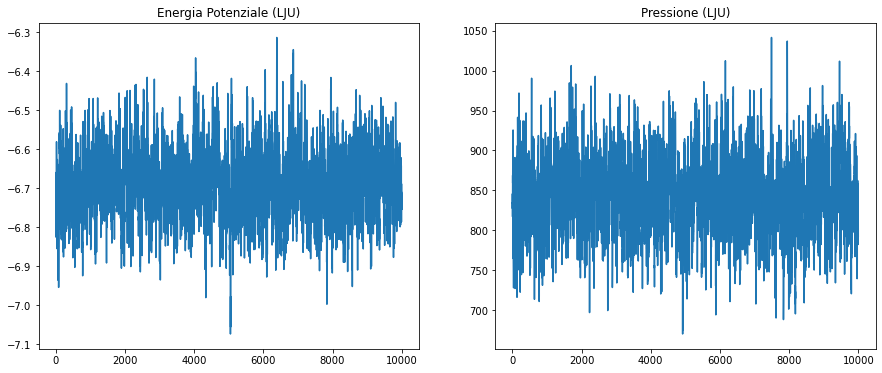

In [3]:
epotfile = "./data/7/timeseries/timeseries.epot.dat"
epot = np.loadtxt(epotfile)

presfile= "./data/7/timeseries/timeseries.pres.dat"
pressure = np.loadtxt(presfile)

fig, ax = plt.subplots(1,2, figsize=(15,6))

ax[0].plot(epot)
ax[0].title.set_text("Energia Potenziale (LJU)")

ax[1].plot(pressure)
ax[1].title.set_text("Pressione (LJU)")

plt.show()

In [4]:
# Autocorrelazione

def autocorrelazione(x, t, tmax):
    corr = 0
    mu = 0
    mu_t = 0
    T = tmax-t
    for i in range(T):
        corr += x[i]*x[i+t]
        mu += x[i]
        mu_t += x[i+t]
    corr += -(mu*mu_t) / T
    corr /= T
    return corr


def negexp(x, a, b):
    return a * np.exp(-b * x)


N = 10000
var_epot = np.var(epot)
var_pres = np.var(pressure)
corr_epot = np.zeros(N)
corr_pres = np.zeros(N)

In [5]:
for i in range(N):
    corr_epot[i] = autocorrelazione(epot, i, N)
    corr_pres[i] = autocorrelazione(pressure, i, N)

corr_epot /= var_epot
corr_pres /= var_pres

Potential Energy t_c is : 9.459857769098658
Pressure t_c is : 8.876958208553155


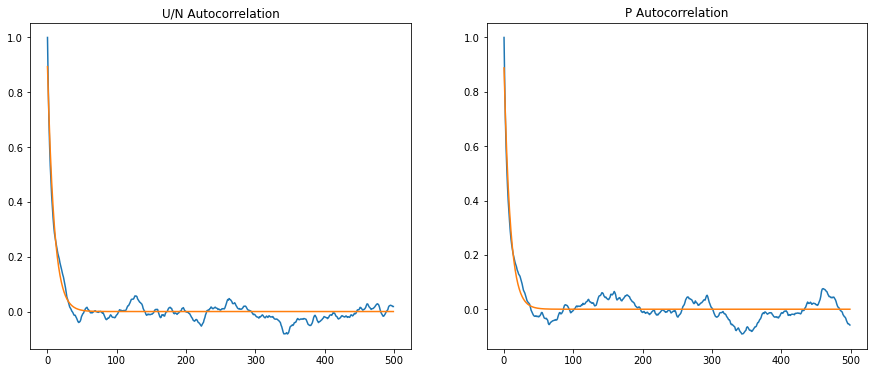

In [6]:
# Plot
fig, ax = plt.subplots(1,2, figsize=(15,6))

n = 500
x = np.linspace(0,n,n,endpoint=True)
y = corr_epot[0:n]
pars, cov = curve_fit(negexp, x, y, bounds=([-1,-1],[1,1]))
ax[0].plot(y)
ax[0].plot(negexp(x, pars[0], pars[1]))
ax[0].title.set_text("U/N Autocorrelation")

print("Potential Energy t_c is :", 1/pars[1])

n = 500
x = np.linspace(0,n,n,endpoint=True)
y = corr_pres[0:n]
pars, cov = curve_fit(negexp, x, y, bounds=([-1,-1],[1,1]))
ax[1].plot(y)
ax[1].plot(negexp(x, pars[0], pars[1]))
ax[1].title.set_text("P Autocorrelation")

print("Pressure t_c is :", 1/pars[1])

plt.show()

In [7]:
def blocking_method_error(X, N, L):

    # compute blocked averages of x
    
    ave = np.zeros(N)
    av2 = np.zeros(N)
    for i in range(N):
        sum = 0
        for j in range(L):
            k = j + i*L
            sum += X[k]
        ave[i] = sum/L
        av2[i] = ave[i]**2

    # compute averages and average of squares
    
    sum = 0
    sum2 = 0
    for i in range(N):
        sum += ave[i]
        sum2 += av2[i]
    sum /= N
    sum2 /= N

    # compute error
    
    error = np.sqrt((sum2 - sum**2)/n)

    return error

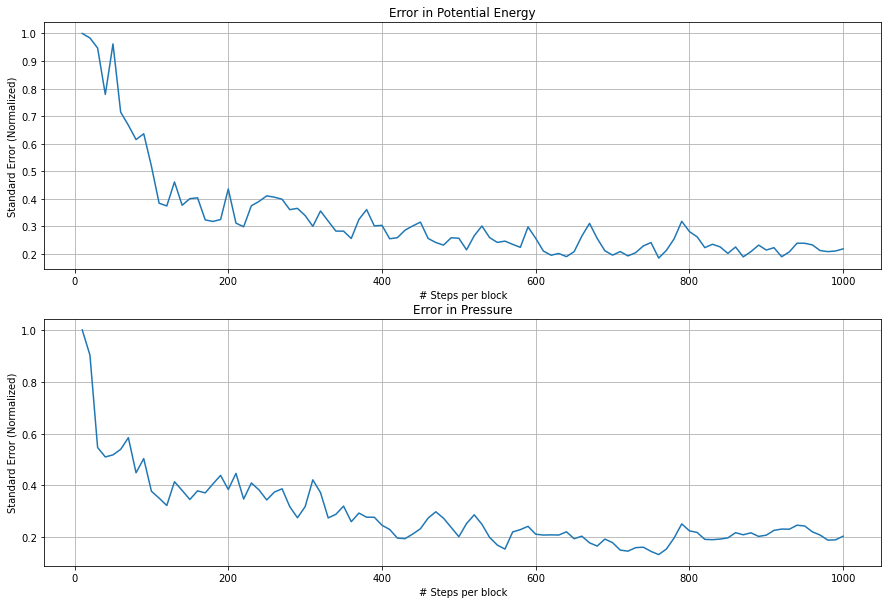

In [10]:
n = 100
L = np.linspace(10, 1000, n, endpoint=True, dtype=int)

error_epot = np.zeros(n)
error_press = np.zeros(n)

for i in range(n):
    error_epot[i] = blocking_method_error(epot, 10, L[i])

for i in range(n):
    error_press[i] = blocking_method_error(pressure, 10, L[i])


fig, ax = plt.subplots(2,1, figsize=(15,10))

ax[0].plot(L, error_epot/np.max(error_epot))
ax[0].grid(True)
ax[0].title.set_text("Error in Potential Energy")
ax[0].set_xlabel("# Steps per block")
ax[0].set_ylabel("Standard Error (Normalized)")

ax[1].plot(L, error_press/np.max(error_press))
ax[1].grid(True)
ax[1].title.set_text("Error in Pressure")
ax[1].set_xlabel("# Steps per block")
ax[1].set_ylabel("Standard Error (Normalized)")

plt.show()

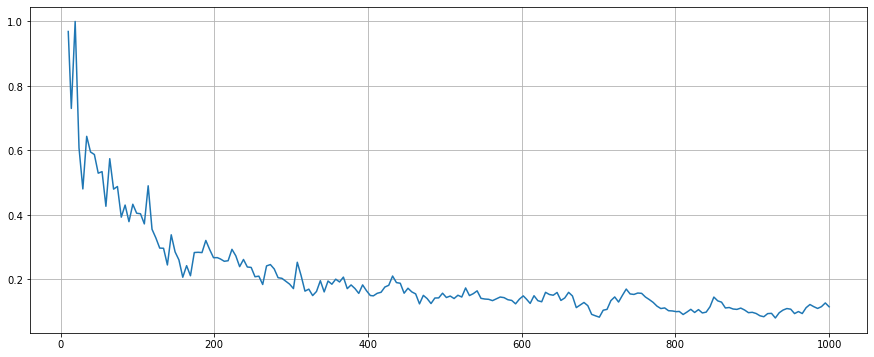

In [19]:
N = 10
n = 200
M = 10000
r = np.random.rand(M)
L = np.linspace(10, int(M/N), n, endpoint=True, dtype=int)

error_r = np.zeros(n)
for i in range(n):
    error_r[i] = blocking_method_error(r, N, L[i])

plt.figure(figsize=(15, 6))
plt.plot(L, error_r/np.max(error_r))
plt.grid()
plt.show()

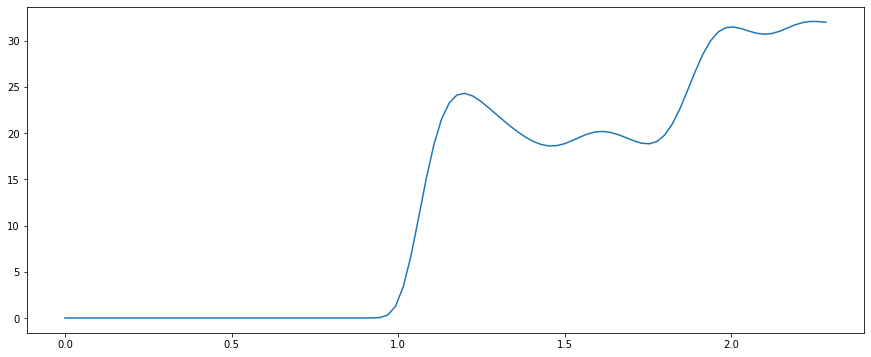

In [92]:
# GofR

datafile = "./data/7/averages/ave_gdir.dat"
lb, avg, error = np.loadtxt(datafile, skiprows=9900, usecols=(2,4,5), delimiter =' ', unpack=True)

plt.figure(figsize=(15,6))
plt.errorbar(lb, avg, yerr=error)
plt.show()